<H1> Import Libraries </H1>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h1> Load dataset </h1>

In [6]:
df= pd.read_csv('train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<H1>Exploratory Data Analysis</H1>

In [9]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [11]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
df['SalePrice'].max() - df['SalePrice'].min()

720100

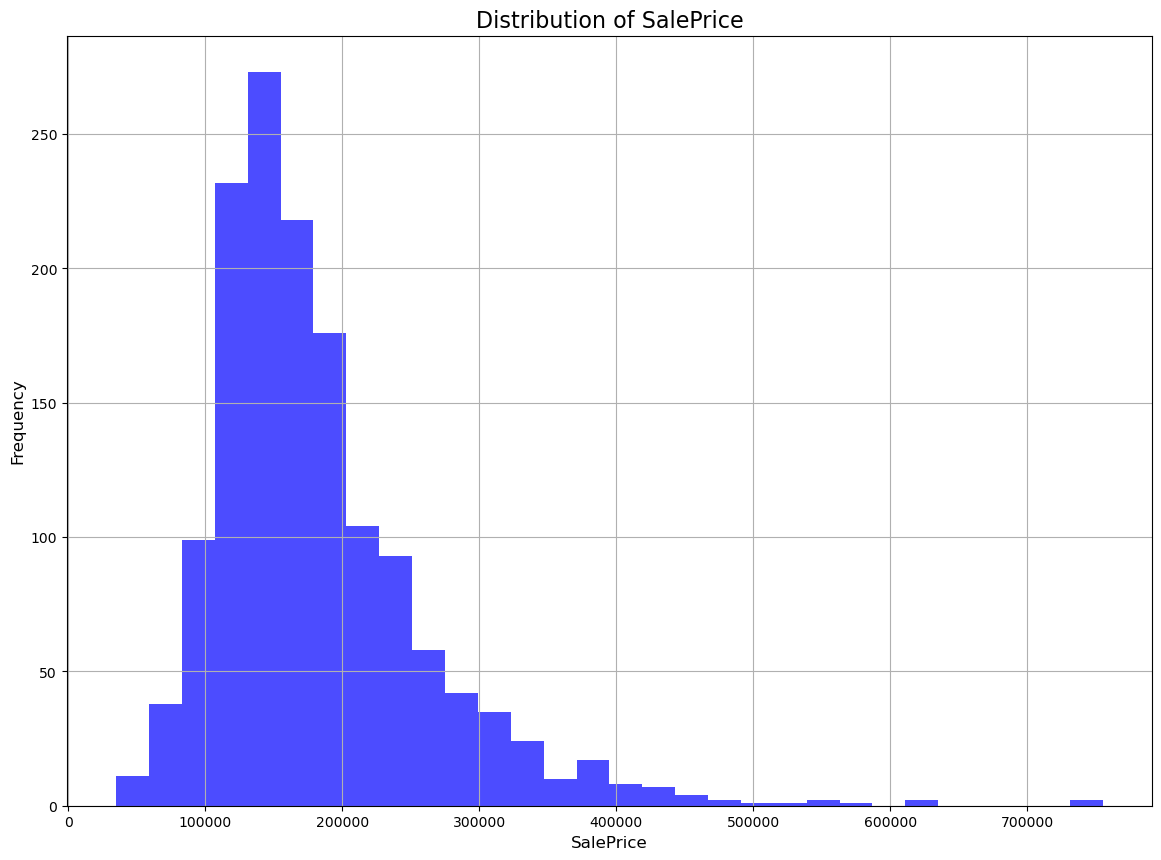

In [13]:

plt.figure(figsize=(14, 10)) 
plt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)  
plt.title('Distribution of SalePrice', fontsize=16)  
plt.xlabel('SalePrice', fontsize=12)  
plt.ylabel('Frequency', fontsize=12)  
plt.grid(True) 
plt.show()  

<H1> Handle Missing Values</H1>

In [15]:
df['LotFrontage'] = df.groupby(['Neighborhood', 'LotShape'])['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)
frontage_to_area_ratio = df['LotFrontage'] / df['LotArea']
average_ratio = frontage_to_area_ratio.mean()
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotArea'] * average_ratio)

In [16]:
df['Alley'] = df['Alley'].fillna('No Alley')

In [17]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [18]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [19]:
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']:
    df[col] = df[col].fillna('No Basement')

In [20]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('No garage')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [21]:
df['Fence'] = df['Fence'].fillna('No Fence')

In [22]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

In [23]:
df['MiscFeature'] = df['MiscFeature'].fillna('No feature')

In [24]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [25]:
df['PoolQC'] = df['PoolQC'].fillna('No Pool')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<H1>Data Transformation</H1>

In [28]:
le = LabelEncoder()

In [29]:
df['MSZoning'] = le.fit_transform(df['MSZoning'])

In [30]:
df['Street'] = le.fit_transform(df['Street'])

In [31]:
df['Alley'] = le.fit_transform(df['Alley'])

In [32]:
df['LotShape'] = le.fit_transform(df['Alley'])

In [33]:
df['Utilities'] = le.fit_transform(df['Utilities'])

In [34]:
df['LandContour'] = le.fit_transform(df['LandContour'])

In [35]:
df['LotConfig'] = le.fit_transform(df['LotConfig'])

In [36]:
df['LandSlope'] = le.fit_transform(df['LandSlope'])

In [37]:
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])

In [38]:
df['Condition1'] = le.fit_transform(df['Condition1'])

In [39]:
df['Condition2'] = le.fit_transform(df['Condition2'])

In [40]:
df['BldgType'] = le.fit_transform(df['BldgType'])

In [41]:
df['HouseStyle'] = le.fit_transform(df['HouseStyle'])

In [42]:
df['RoofStyle'] = le.fit_transform(df['RoofStyle'])

In [43]:
df['RoofMatl'] = le.fit_transform(df['RoofMatl'])

In [44]:
df['Exterior1st'] = le.fit_transform(df['Exterior1st'])

In [45]:
df['Exterior2nd'] = le.fit_transform(df['Exterior2nd'])

In [46]:
df['MasVnrType'] = le.fit_transform(df['MasVnrType'])

In [47]:
df['ExterQual'] = le.fit_transform(df['ExterQual'])

In [48]:
df['ExterCond'] = le.fit_transform(df['ExterCond'])

In [49]:
df['Foundation'] = le.fit_transform(df['Foundation'])

In [50]:
df['BsmtQual'] = le.fit_transform(df['BsmtQual'])

In [51]:
df['BsmtCond'] = le.fit_transform(df['BsmtCond'])

In [52]:
df['BsmtExposure'] = le.fit_transform(df['BsmtExposure'])

In [53]:
df['BsmtFinType1'] = le.fit_transform(df['BsmtFinType1'])

In [54]:
df['BsmtFinType2'] = le.fit_transform(df['BsmtFinType2'])

In [55]:
df['Heating'] = le.fit_transform(df['Heating'])

In [56]:
df['HeatingQC'] = le.fit_transform(df['HeatingQC'])

In [57]:
df['CentralAir'] = le.fit_transform(df['CentralAir'])

In [58]:
df['Electrical'] = le.fit_transform(df['Electrical'])

In [59]:
df['KitchenQual'] = le.fit_transform(df['KitchenQual'])

In [60]:
df['Functional'] = le.fit_transform(df['Functional'])

In [61]:
df['FireplaceQu'] = le.fit_transform(df['FireplaceQu'])

In [62]:
df['GarageType'] = le.fit_transform(df['GarageType'])

In [63]:
df['GarageFinish'] = le.fit_transform(df['GarageFinish'])

In [64]:
df['GarageQual'] = le.fit_transform(df['GarageQual'])

In [65]:
df['GarageCond'] = le.fit_transform(df['GarageCond'])

In [66]:
df['PavedDrive'] = le.fit_transform(df['PavedDrive'])

In [67]:
df['PoolQC'] = le.fit_transform(df['PoolQC'])

In [68]:
df['Fence'] = le.fit_transform(df['Fence'])

In [69]:
df['MiscFeature'] = le.fit_transform(df['MiscFeature'])

In [70]:
df['SaleType'] = le.fit_transform(df['SaleType'])

In [71]:
df['SaleCondition'] = le.fit_transform(df['SaleCondition'])

<H1> Heatmap for correlation between features and target variables</H1>

<Axes: >

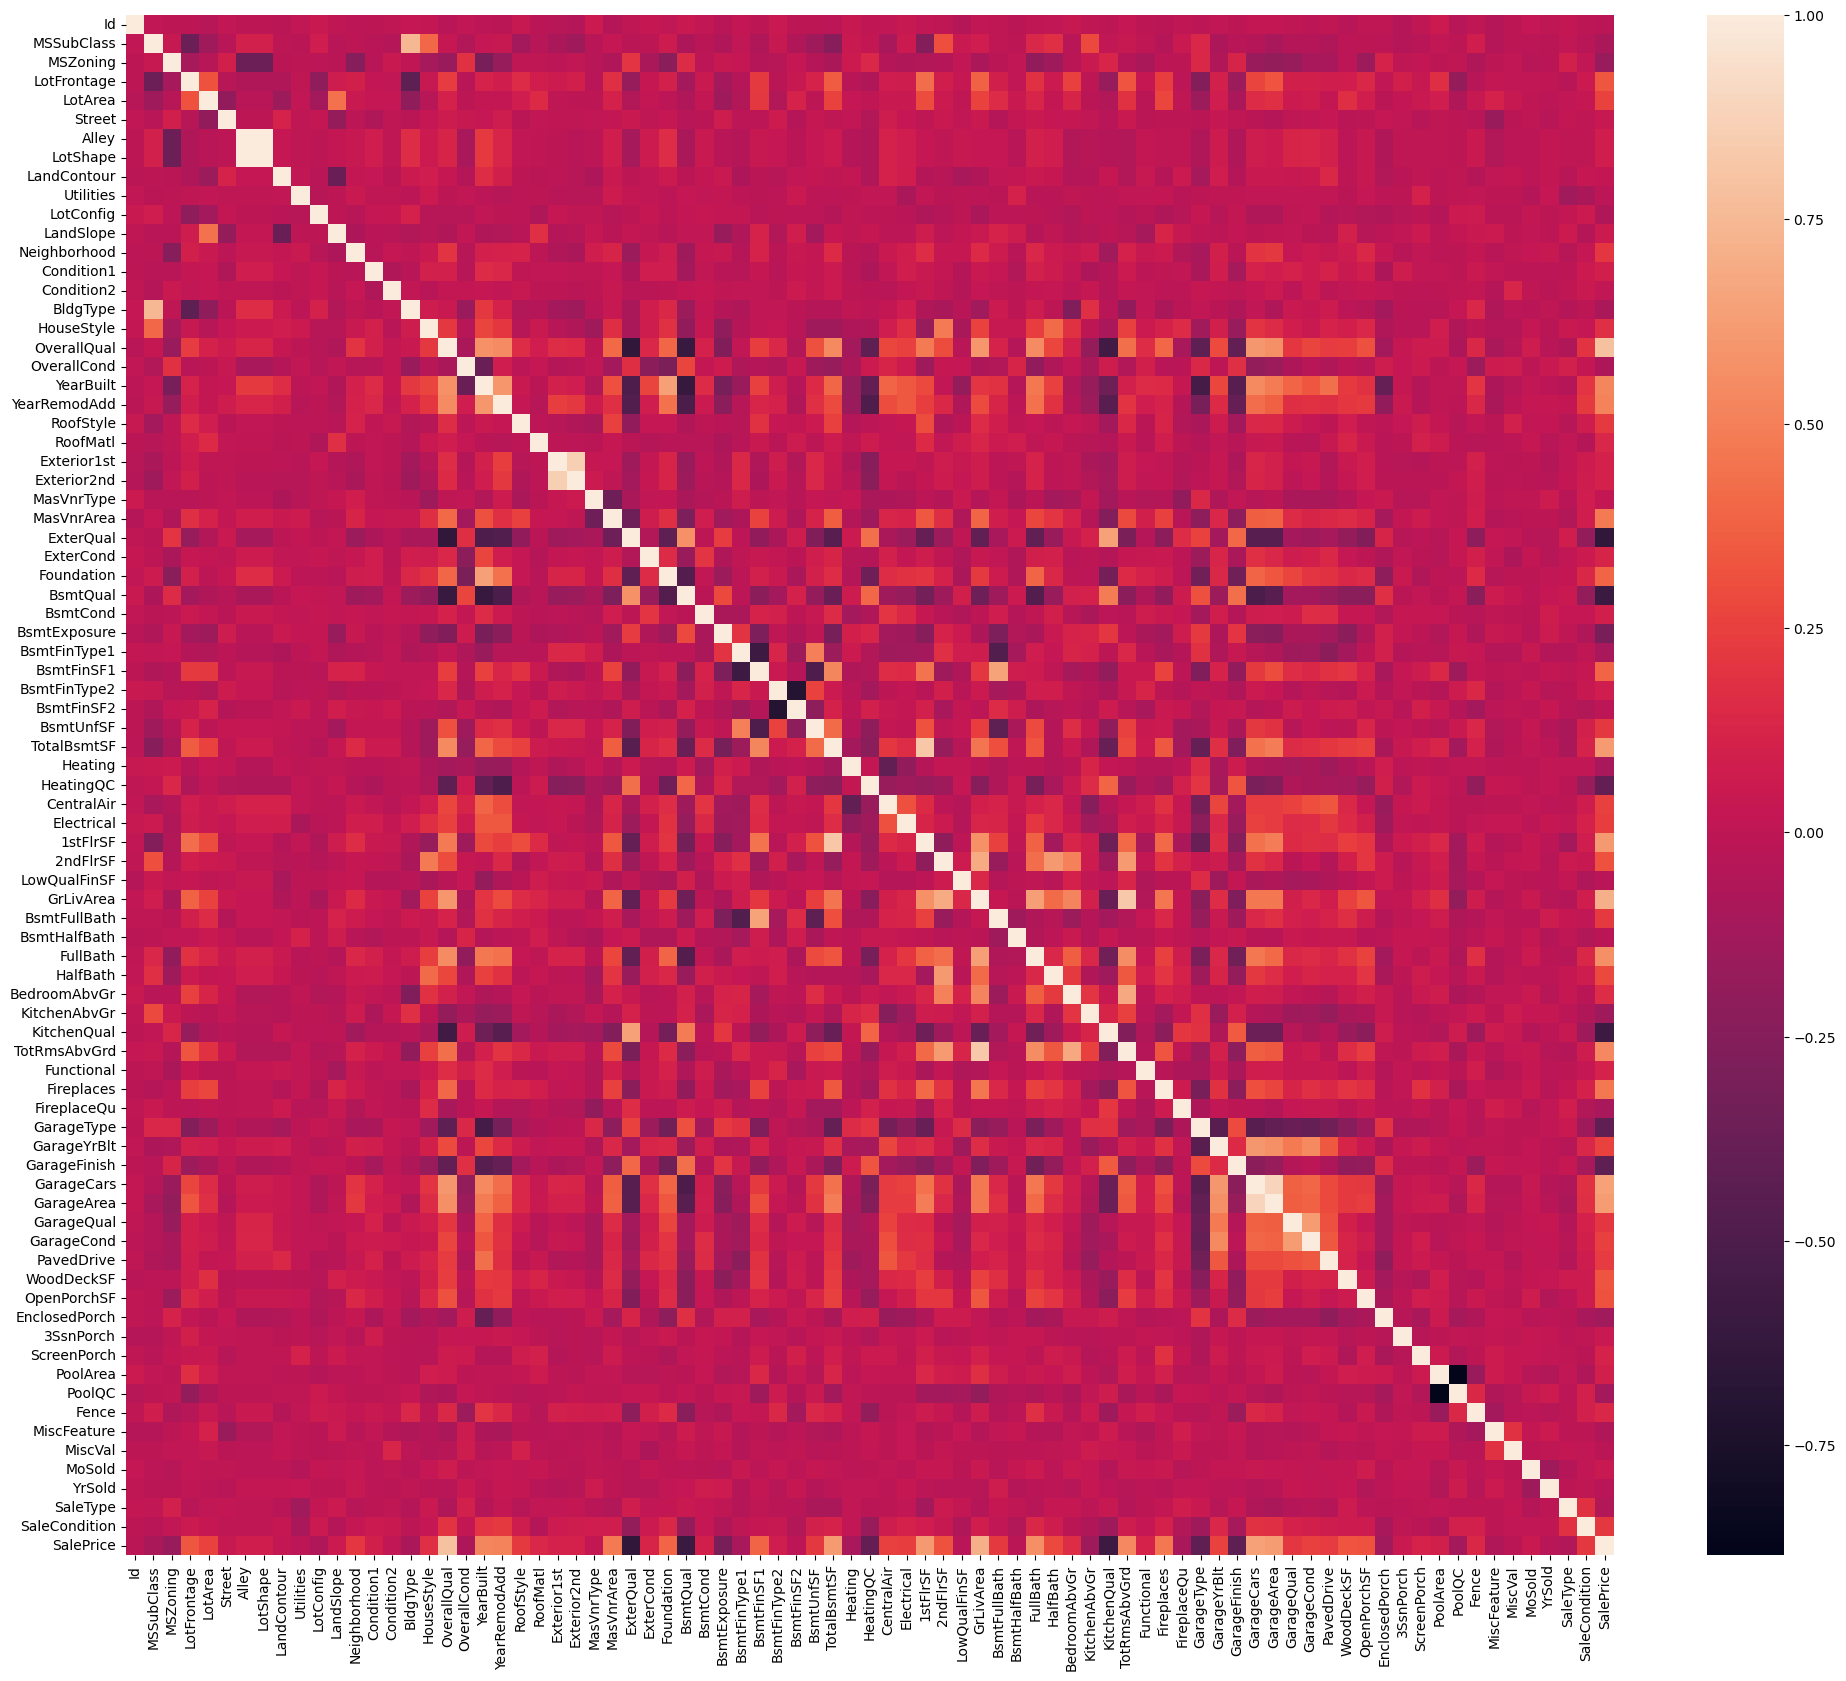

In [73]:
figure, ax = plt.subplots(figsize = (24, 20))
sns.heatmap(df.corr(), ax = ax)

In [74]:
df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.003922,-0.033226,0.008916,-0.002855,-0.002855,-0.019659,0.013324,...,0.057044,-0.033928,-0.000399,-0.038103,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.364628,-0.139781,-0.024969,0.099430,0.099430,-0.002940,-0.022844,...,0.008283,-0.005221,0.086360,-0.046881,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.109835,-0.034452,0.087654,-0.368086,-0.368086,-0.017854,-0.001192,...,-0.003128,0.002882,-0.061289,-0.005553,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.003922,-0.364628,-0.109835,1.000000,0.322121,-0.035707,-0.067162,-0.067162,-0.070760,0.002795,...,0.169921,-0.181358,-0.032006,0.015894,0.009739,0.007555,-0.000593,-0.028520,0.053155,0.337543
LotArea,-0.033226,-0.139781,-0.034452,0.322121,1.000000,-0.197131,-0.029676,-0.029676,-0.149083,0.010123,...,0.077672,-0.065167,0.036031,0.106135,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.007555,0.001205,0.003690,-0.011274,-0.011274,-0.011599,-0.051552,...,-0.033737,0.036368,-0.009892,0.013957,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,-0.000593,-0.014261,-0.025043,0.015176,0.015176,0.020507,0.023353,...,-0.059689,0.060904,-0.035366,0.057708,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.028520,0.012292,0.014339,0.001092,0.001092,-0.025754,-0.126770,...,0.011009,-0.013592,-0.006154,-0.003340,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.053155,0.034169,0.006064,-0.000162,-0.000162,0.033809,-0.089701,...,-0.067251,0.097425,0.100675,-0.008074,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


<H1>Handling Outliers</H1>

In [76]:
numerical_cols = df.select_dtypes(include = ['float64', 'int32', 'int64'])

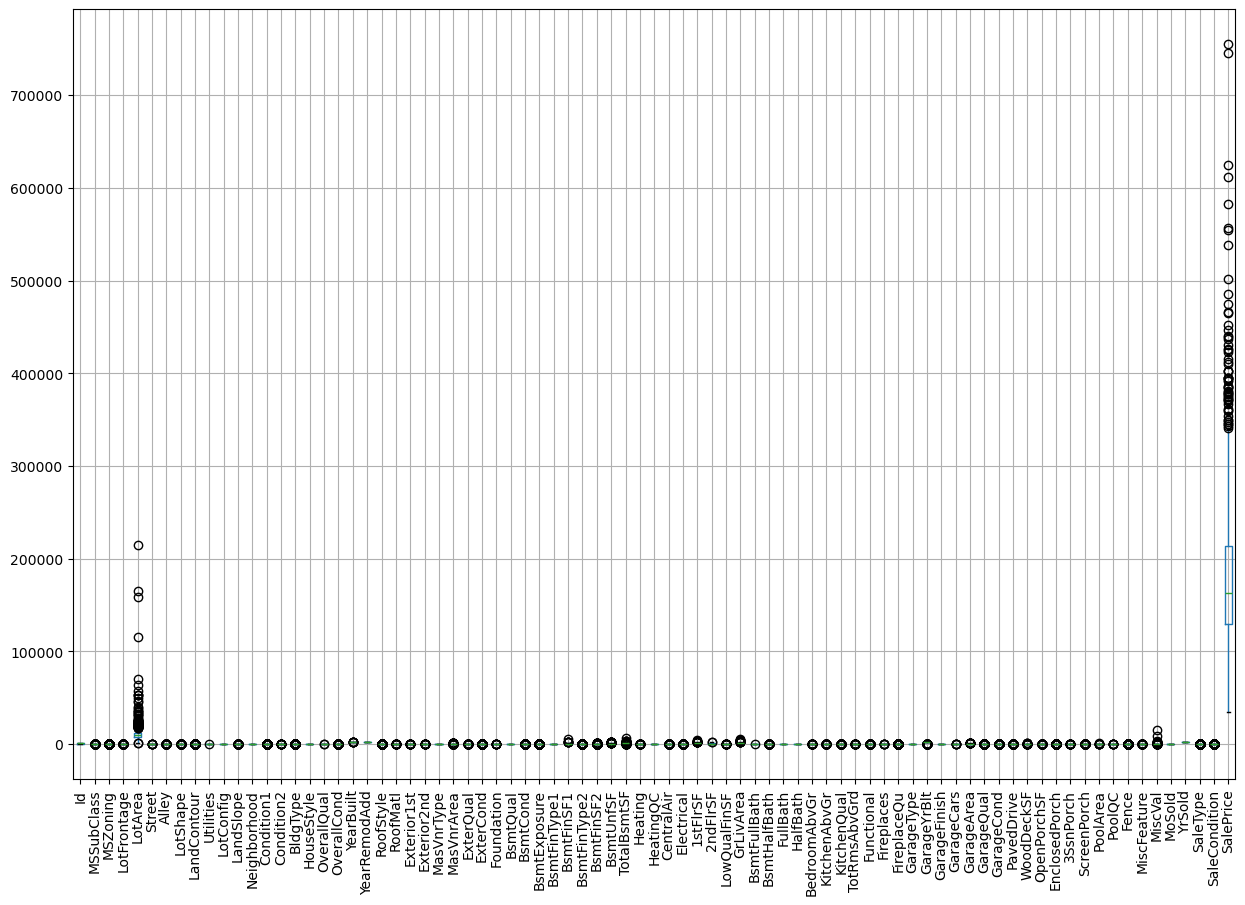

In [77]:
numerical_cols.boxplot(figsize = (15, 10))
plt.xticks(rotation = 90)
plt.show()

In [78]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [79]:
iqr

Id                 729.5
MSSubClass          50.0
MSZoning             0.0
LotFrontage         20.0
LotArea           4048.0
                  ...   
MoSold               3.0
YrSold               2.0
SaleType             0.0
SaleCondition        0.0
SalePrice        84025.0
Length: 81, dtype: float64

In [80]:
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

In [81]:
numerical_cols = df.clip(lower_bound, upper_bound,axis =1)

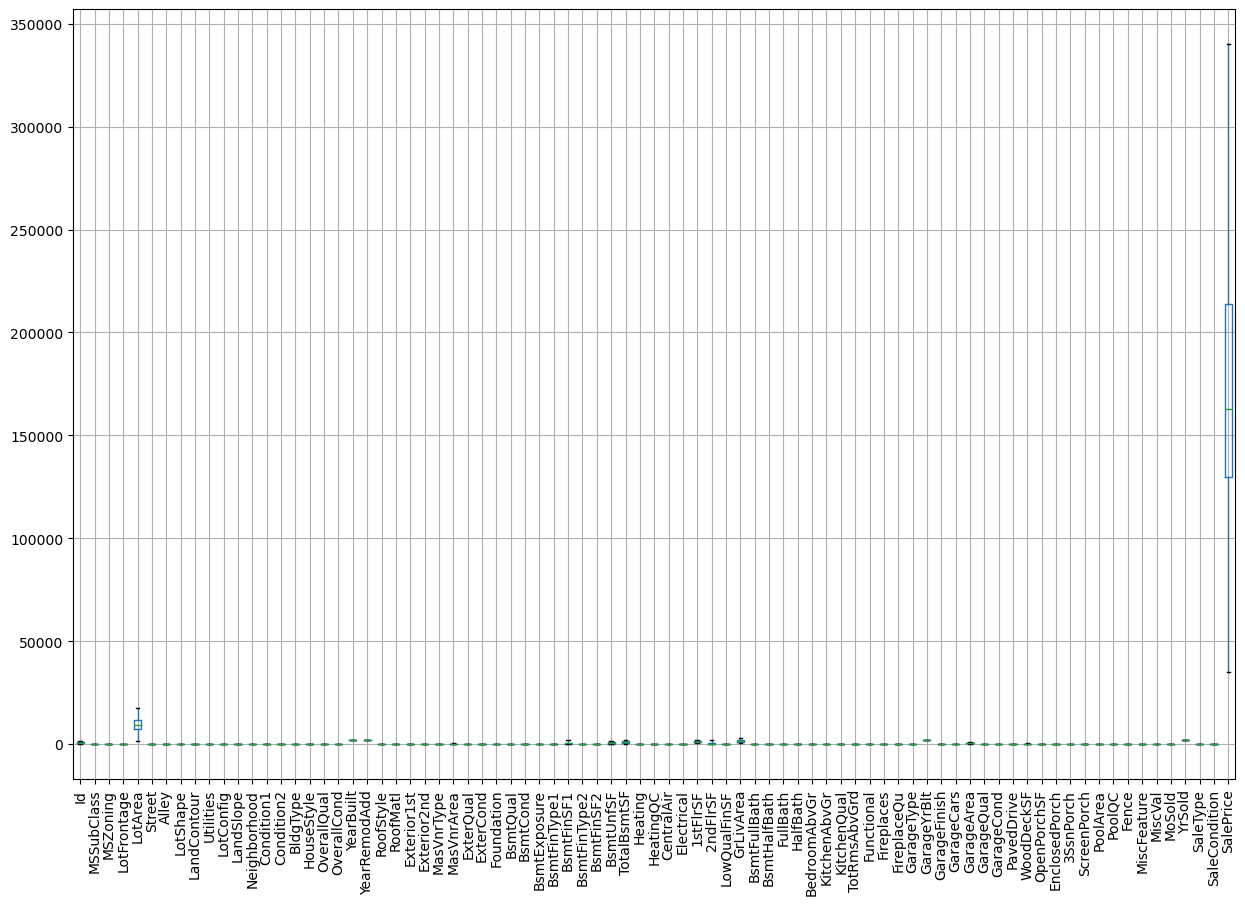

In [82]:
numerical_cols.boxplot(figsize = (15, 10))
plt.xticks(rotation = 90)
plt.show()

<H1> Data Preparation </H1>

In [84]:
df = df.drop(['Id','MSSubClass', 'LotShape', 'Exterior1st', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars', 'GarageCond'], axis = 1)

In [85]:
X = df.drop(columns = ['SalePrice'])
Y = df['SalePrice']

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<H1> Initialize SVR Model </H1>

In [89]:
svr = SVR()

<H1>Initialize Parameters for SVR Model </H1>

In [91]:
gamma_value = 1/X_train.shape[1]
parameter_space = {
    'kernel' : ['poly', 'linear','rbf'],
    'degree': [1,3,5],
    'coef0':[7,8,9],
    'gamma': [1e-1, 1e-2, 1e-3, gamma_value],
    'C': [1, 3, 5]
}

In [92]:
clf = GridSearchCV(svr, parameter_space, cv=5, n_jobs = 4, scoring = 'neg_mean_squared_error')

In [93]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=4,
             param_grid={'C': [1, 3, 5], 'coef0': [7, 8, 9],
                         'degree': [1, 3, 5],
                         'gamma': [0.1, 0.01, 0.001, 0.013888888888888888],
                         'kernel': ['poly', 'linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [94]:
print('Best Parameters', clf.best_params_)

Best Parameters {'C': 5, 'coef0': 9, 'degree': 5, 'gamma': 0.001, 'kernel': 'poly'}


<H1> Fit the SVR model with best parameters </H1>

In [96]:
svr = SVR(**clf.best_params_)

<H1> Training the SVR model </H1>

In [98]:
svr.fit(X_train, Y_train)

SVR(C=5, coef0=9, degree=5, gamma=0.001, kernel='poly')

<H1> Evaluation of the SVR model </H1>

In [100]:
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

In [101]:
train_r2 = r2_score(Y_train, y_pred_train)
train_svr_mse = mean_squared_error(Y_train, y_pred_train)
train_svr_mae = mean_absolute_error(Y_train, y_pred_train)

In [102]:
print("Training data SVR MAE =", train_svr_mae)
print('Training data R2 =', train_r2)
print("Training data SVR MSE =", train_svr_mse)

Training data SVR MAE = 17224.49092771944
Training data R2 = 0.8091428291508572
Training data SVR MSE = 1158778840.6003048


In [103]:
test_r2 = r2_score(Y_test, y_pred_test)
test_svr_mae = mean_absolute_error(Y_test, y_pred_test)
test_svr_mse = mean_squared_error(Y_test, y_pred_test)

In [104]:
print("Testing data SVR MAE =", test_svr_mae)
print('Testing data R2 =', test_r2)
print("Testing data SVR MSE =", test_svr_mse)

Testing data SVR MAE = 18101.492979638522
Testing data R2 = 0.853883401004773
Testing data SVR MSE = 1023591933.6382979


<H1> Predicitions made by the SVR model </H1>

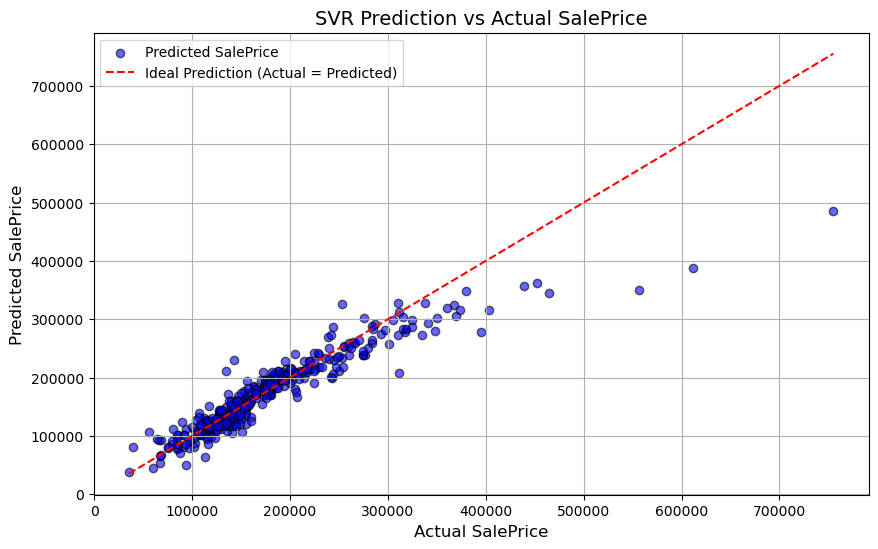

In [106]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(Y_test, y_pred_test, color='blue', alpha=0.6, edgecolor='k', label='Predicted SalePrice')

# Diagonal line for reference
max_val = max(max(Y_test), max(y_pred_test))
min_val = min(min(Y_test), min(y_pred_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction (Actual = Predicted)')

# Adding titles and labels
plt.title('SVR Prediction vs Actual SalePrice', fontsize=14)
plt.xlabel('Actual SalePrice', fontsize=12)
plt.ylabel('Predicted SalePrice', fontsize=12)

# Adding legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


<H1> Initialize parameters for Ridge Model</H1>

In [108]:
parameter_space = {
    'alpha':[1, 10, 100],
    'fit_intercept':[True, False],
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [109]:
clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs = 4, cv= 5, scoring = 'neg_mean_absolute_error')

In [110]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=3), n_jobs=4,
             param_grid={'alpha': [1, 10, 100], 'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='neg_mean_absolute_error')

In [111]:
print('Best parameters', clf.best_params_)

Best parameters {'alpha': 100, 'fit_intercept': True, 'solver': 'svd'}


<h1> Fit the Ridge Model with best parameters </h1>

In [113]:
ridge = Ridge(random_state = 3, **clf.best_params_)

<h1> Training the Ridge Regression Model </h1>

In [115]:
ridge.fit(X_train, Y_train)

Ridge(alpha=100, random_state=3, solver='svd')

<h1> Evaluation of the Ridge Regression Model </h1>

In [117]:
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

In [118]:
train_ridge_r2 = r2_score(Y_train, y_pred_train_r)
train_ridge_mse = mean_squared_error(Y_train, y_pred_train_r)
train_ridge_mae = mean_absolute_error(Y_train, y_pred_train_r)

In [119]:
print("Training data Ridge MAE =", train_ridge_mae)
print('Training data R2 =', train_ridge_r2)
print("Training data Ridge MSE =", train_ridge_mse)

Training data Ridge MAE = 19051.695365214935
Training data R2 = 0.8392628371740183
Training data Ridge MSE = 975906864.5531592


In [120]:
test_ridge_r2 = r2_score(Y_test, y_pred_test_r)
test_ridge_mae = mean_absolute_error(Y_test, y_pred_test_r)
test_ridge_mse = mean_squared_error(Y_test, y_pred_test_r)

In [121]:
print("Testing data Ridge MAE =", test_ridge_mae)
print('Testing data R2 =', test_ridge_r2)
print("Testing data  Ridge MSE =", test_ridge_mse)

Testing data Ridge MAE = 20640.449462816407
Testing data R2 = 0.8456426639316723
Testing data  Ridge MSE = 1081320843.6544387


<h1> Predictions made by the Ridge Regression Model </h1>

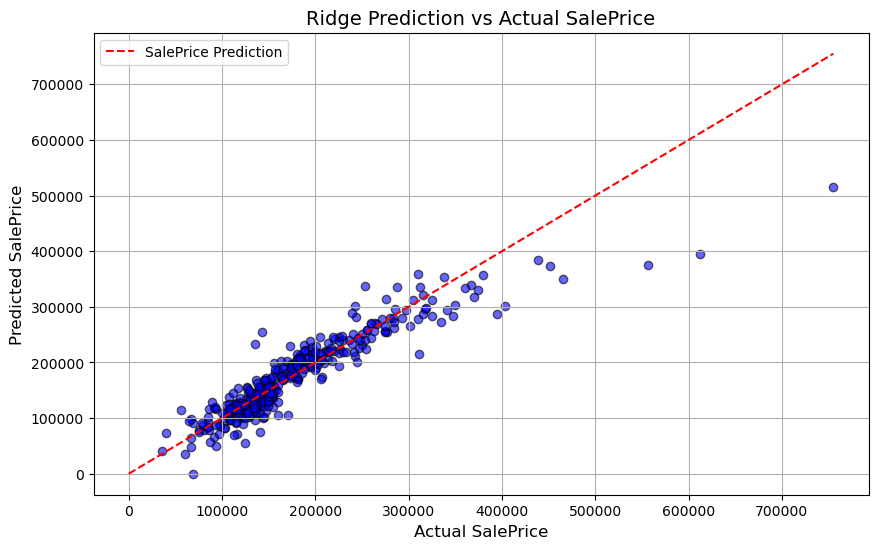

In [123]:
plt.figure(figsize = (10, 6))
plt.scatter(Y_test, y_pred_test_r, color = 'blue', alpha = 0.6, edgecolor = 'k')

max_val_r = max(max(Y_test), max(y_pred_test_r))
min_val_r = min(min(Y_test), min(y_pred_test_r))
plt.plot([min_val_r, max_val_r], [min_val_r, max_val_r], color = 'red', linestyle='--', label = 'SalePrice Prediction')

plt.title('Ridge Prediction vs Actual SalePrice',fontsize = 14)
plt.xlabel('Actual SalePrice', fontsize=12)
plt.ylabel('Predicted SalePrice', fontsize = 12)
plt.legend()
plt.grid(True)
plt.show()

<h1> Comparison of the MAE metric of the models </h1>

[Text(0.5, 0, 'MAE (smaller is better)'), Text(0, 0.5, 'Model')]

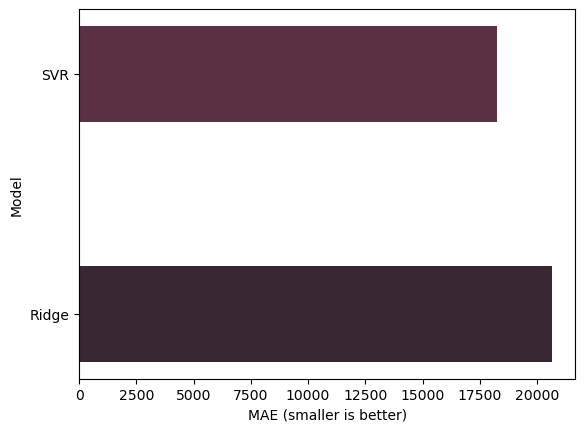

In [125]:
x = ['Ridge', 'SVR']
y = [20632.76, 18270.8]

colors = ["#392834", "#5a3244"]
fig, ax = plt.subplots()
plt.barh(y = range(len(x)), tick_label=x, width = y, height=0.4, color = colors);
ax.set(xlabel = 'MAE (smaller is better)', ylabel= 'Model')

<h1> Comaprison of the R2 score of the models </h1>

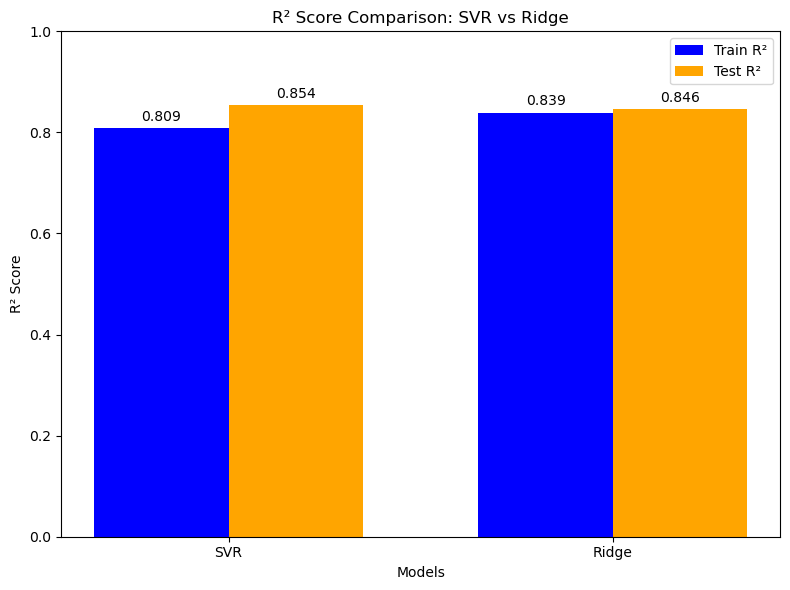

In [127]:
models = ['SVR', 'Ridge']
train_scores = [train_r2, train_ridge_r2]
test_scores = [test_r2, test_ridge_r2]

x = np.arange(len(models))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, train_scores, width, label='Train R²', color='blue')
bar2 = ax.bar(x + width/2, test_scores, width, label='Test R²', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('R² Score Comparison: SVR vs Ridge')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)  
ax.legend()

for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()